<h1><center>JOB-A-THON, 11-13 Feb 2022, Engagement Score Prediction</center><h1>

<center><img width=40% src="engagement_infographic.jpg?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Importing Relevant Libraries**](#Section2)<br>
  - **2.1** [**Importing Libraries**](#Section21)

**3.** [**Data Description**](#Section3)<br>
  - **3.1** [**Data Inspection**](#Section31)
  - **3.2** [**Data Information**](#Section32)

**4.** [**Data Pre-processing**](#Section4)<br>
  - **4.1** [**Data Pre-profiling**](#Section41)<br>
  - **4.2** [**Data Pre-Processing**](#Section42)<br>

**5.** [**Exploratory Data Analysis**](#Section5)<br>
**6.** [**Data Post-Processing**](#Section6)<br>
  - **6.1** [**Data Encoding**](#Section61)<br> 
  - **6.2** [**Data Preparation**](#Section62)<br>
  - **6.3** [**Data Scaling**](#Section63)<br>

**7.** [**Model Development & Evaluation**](#Section7)<br>
**8.** [**Summary**](#Section8)<br>
  - **8.1** [**Conclusion**](#Section81)<br>

---
<a name = Section1></a>
# **1. Problem Statement**
---

- ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

- Users can like, comment and share the videos on the platform. 

- Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is.

- Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.

<a name = Section11></a>
### **Objective**

- The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.

<a name = Section12></a>
### **Submission**
- Deliverable: **Engagement Score Prediction**

- Machine Learning Task: **Regression**

- Target Variable: **engagement_score**

<a name = Section13></a>
### **Evaluation Metric**

- The model evaluation will be based on the R2 score.

---
<a name = Section2></a>
# **2. Importing Libraries**
---

<a name = Section21></a>
### **2.1 Importing Relevant Libraries**

In [1559]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
from matplotlib import pyplot
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV    
from sklearn.model_selection import RandomizedSearchCV # To find best hyperparamter setting for the algorithm
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression                 
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section3></a>
# **3. Data Description**
---

- The **dataset** consists of all the necessary information related to Engagement Score.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 89197 | 10 | 6.8+ MB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **row_id**   | Unique identifier of the row |
|02| **user_id**      | Unique identifier of the user|
|03| **category_id**        | Category of the video|
|04| **video_id**          | Unique identifier of the video|
|05| **age**      | Age of the user |
|06| **gender**           | Gender of the user (Male and Female)|
|07| **profession**     | Profession of the user (Student, Working Professional, Other)|
|08| **followers**        | No. of users following a particular category |
|09| **views**          | Total views of the videos present in the particular category    |
|10| **engagement_score**         |Engagement score of the video for a user  |

<br>

- Load train dataset to be used for Training and Validation

In [1560]:
# Load train csv dataset
train = pd.read_csv("train_0OECtn8.csv")

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', train.shape)

# Output first 10 data rows
train.head(10)


Shape of the Training and Validation dataset: (89197, 10)


,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13
5,6,9323,25,139,35,Male,Other,240,317,3.33
6,7,2071,7,14,23,Male,Student,160,467,3.80
7,8,21848,8,100,18,Male,Student,280,628,3.87
8,9,12896,3,4,15,Male,Student,270,621,2.88
9,10,16058,5,161,19,Male,Student,240,229,3.80


In [1561]:
# Check for any missing values
any(train.isna().sum())

False

In [1562]:
#check if any duplicate row
any(train.duplicated())

False

In [1563]:
# Load test csv dataset
test = pd.read_csv("test_1zqHu22.csv")

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', test.shape)

# Output first 10 data rows
test.head(10)

Shape of the Training and Validation dataset: (11121, 9)


,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840
5,89203,5291,42,134,23,Male,Student,290,689
6,89204,22128,5,109,33,Male,Other,240,229
7,89205,23490,16,137,26,Female,Student,270,462
8,89206,4833,21,123,28,Female,Other,320,909
9,89207,12450,19,44,13,Male,Student,230,369


In [1564]:
# Check for any missing values
any(test.isna().sum())

False

In [1565]:
#check if any duplicate row
any(test.duplicated())

False

<a name = Section31></a>
### **3.1 Data Inspection**

- In this section we will inspect more **information about the data** and see some observations.

In [1566]:
#Basic statistical details for numeric variables
train.describe(include=[np.float64]).transpose()

,count,mean,std,min,25%,50%,75%,max
engagement_score,89197.0,3.487797,0.863498,0.0,2.9,3.71,4.15,5.0


**Observations:**
- Total count for all numeric variables is same as 89197 which confirms that there are no missing values.
- Maximum Engagement score is 5 and minimum is 0 with average score as 3.48

In [1567]:
#Basic statistical details for numeric variables
train.describe(include=[np.int64]).transpose()

,count,mean,std,min,25%,50%,75%,max
row_id,89197.0,44599.000000,25749.100318,1.0,22300.0,44599.0,66898.0,89197.0
user_id,89197.0,13881.909806,8005.582771,1.0,6945.0,13892.0,20819.0,27734.0
category_id,89197.0,18.323733,11.675154,1.0,8.0,16.0,26.0,47.0
video_id,89197.0,77.715383,48.469656,1.0,34.0,76.0,120.0,175.0
age,89197.0,24.848616,8.955535,10.0,18.0,23.0,32.0,68.0
followers,89197.0,252.460172,46.094468,160.0,230.0,240.0,280.0,360.0
views,89197.0,502.980268,268.569482,30.0,229.0,467.0,714.0,1000.0


**Observations:**
- Total count for all numeric variables is same as 89197 which confirms that there are no missing values.
- Maximum age of user is 68 and minimum age is 10 with average age as 24.8
- Overall data appears to have normal distribution

In [1568]:
#Basic statistical details for categorical variables
train.describe(include=[np.object]).transpose()

,count,unique,top,freq
gender,89197,2,Male,52397
profession,89197,3,Student,44638


**Observations:**
- Total count for all categorical variables is same as 89197 which confirms that there are no missing values. 
- Majority of user are Male and having Student as profession

In [1569]:
# display dataset structure
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [1570]:
# Columns list can be handy and useful for further steps
train.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score'],
      dtype='object')

<a name = Section32></a>
### **3.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [1571]:
# Get list of categorical variables
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['gender', 'profession']


In [1572]:
# Get list of numerical float variables
s = (train.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['engagement_score']


In [1573]:
# Get list of numerical int variables
s = (train.dtypes == 'int64')
numeric_int_cols = list(s[s].index)

print("Numeric variables Int:")
print(numeric_int_cols)

Numeric variables Int:
['row_id', 'user_id', 'category_id', 'video_id', 'age', 'followers', 'views']


<a name = Section4></a>

---
# **4. Data Pre-Processing**
---

<a name = Section41></a>
### **4.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [1574]:
profile = ProfileReport(df=train)
profile.to_file(output_file='Engagement Score Prediction Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


**Observations:**

- For detailed information, please check **Enagagement Score Prediction Pre Profiling Report.html** file.

<a name = Section42></a>
### **4.2 Data Pre-Processing**

- There are no missing values and data looks good for EDA but we need to pre process few features before Model Building.

<a name = Section5></a>

---
# **5. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

**Q: What is the breakdown of Gender?**

In [1575]:
# count distribution of Gender
train['gender'].value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

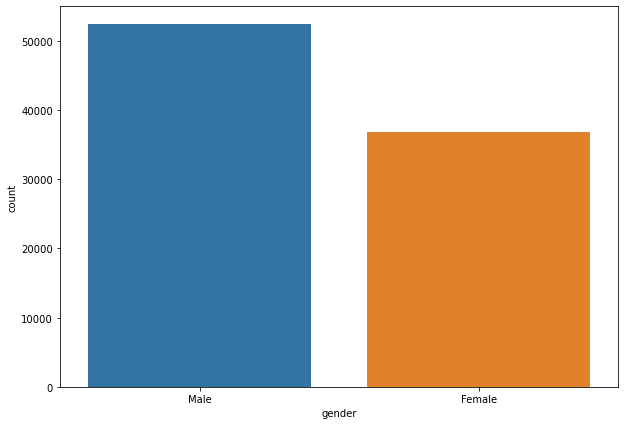

In [1576]:
# plot distribution count of Gender
plt.figure(figsize=(10,7))
sns.countplot(x='gender',data=train,order=train['gender'].value_counts().index)
plt.show()

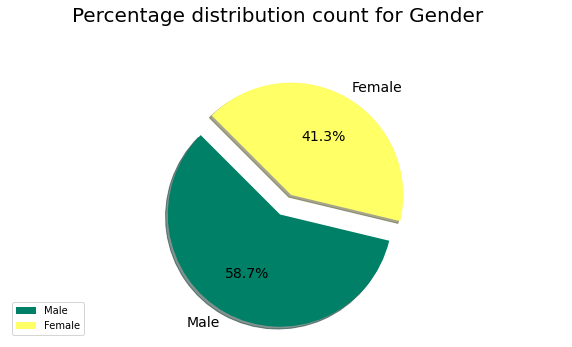

In [1577]:
# plot percentage distribution count of Gender
train['gender'].value_counts().plot(kind='pie', explode=[0.1,0.1], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,5), shadow=True, startangle=135, legend=False, cmap='summer')
plt.suptitle(t = 'Percentage distribution count for Gender', y = 1.05, size = 20)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = train['gender'].value_counts().index, loc ='lower left', frameon = True)
plt.show()

**Q: What is the breakdown of Profession?**

In [1578]:
# count distribution of Profession
train['profession'].value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

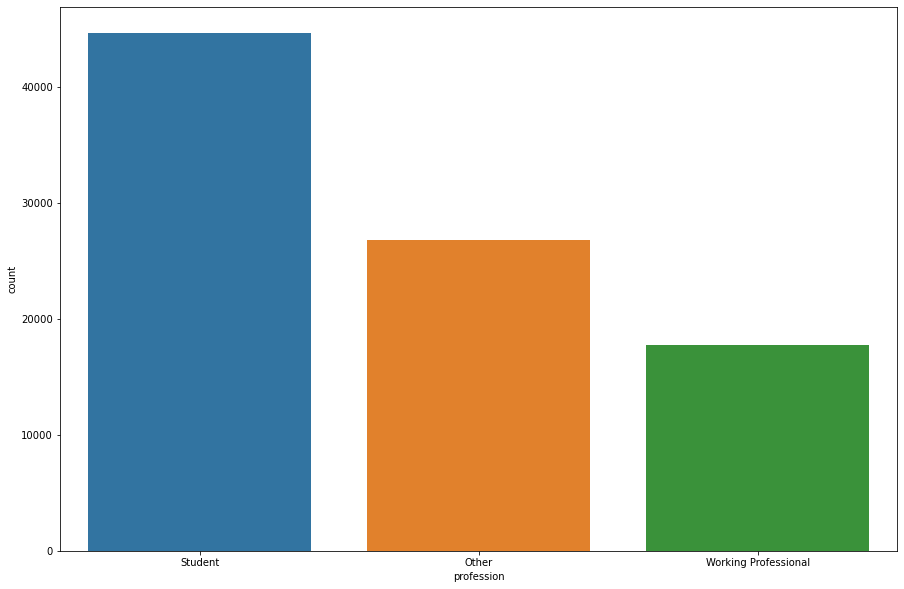

In [1579]:
# plot distribution count of Profession
plt.figure(figsize=(15,10))
sns.countplot(x='profession',data=train,order=train['profession'].value_counts().index)
plt.show()

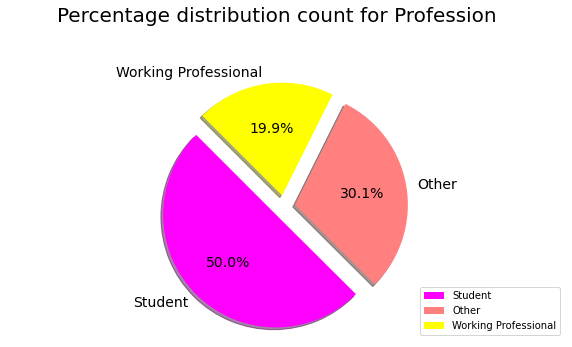

In [1580]:
# plot percentage distribution count of Profession
train['profession'].value_counts().plot(kind='pie', explode=[0.1,0.1,0.1], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,5), shadow=True, startangle=135, legend=False, cmap='spring')
plt.suptitle(t = 'Percentage distribution count for Profession', y = 1.05, size = 20)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = train['profession'].value_counts().index, loc ='lower right', frameon = True)
plt.show()

**Q: What is the breakdown of Age?**

In [1581]:
# count unique distribution of Age
train['age'].unique()

array([24, 14, 19, 27, 35, 23, 18, 15, 30, 36, 29, 16, 33, 17, 40, 25, 55,
       34, 13, 39, 22, 11, 12, 44, 37, 28, 42, 43, 31, 21, 41, 26, 38, 45,
       32, 20, 46, 47, 49, 50, 51, 10, 48, 52, 53, 54, 66, 57, 63, 56, 60,
       59, 68, 58, 64, 67, 61, 62], dtype=int64)

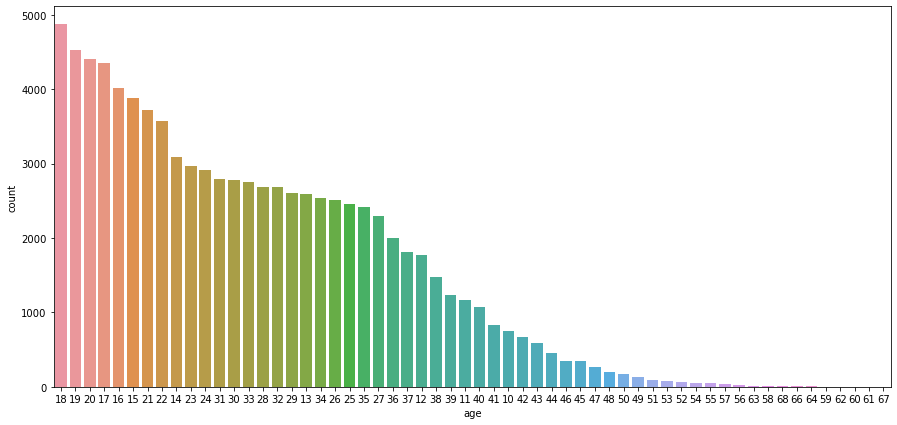

In [1582]:
# plot distribution count of Age
plt.figure(figsize=(15,7))
sns.countplot(x='age',data=train,order=train['age'].value_counts().index)
plt.show()

**Q: What is the breakdown of Engagement Score with respect to Gender?**

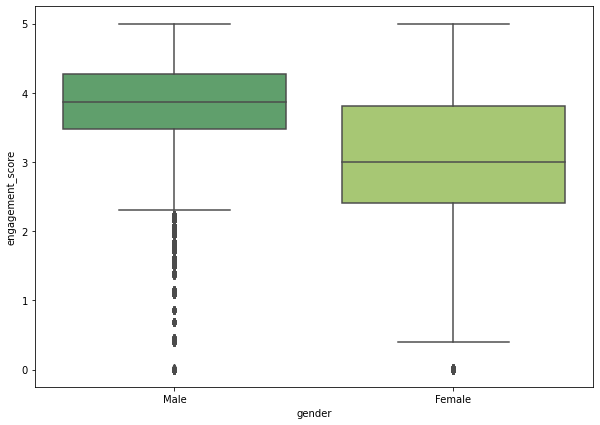

In [1583]:
# plot box distribution of engagement_score with respect to gender
plt.figure(figsize=(10,7))
sns.boxplot(x='gender',y='engagement_score', data=train, palette='summer')
plt.show()

**Q: What is the breakdown of Engagement Score with respect to Profession?**

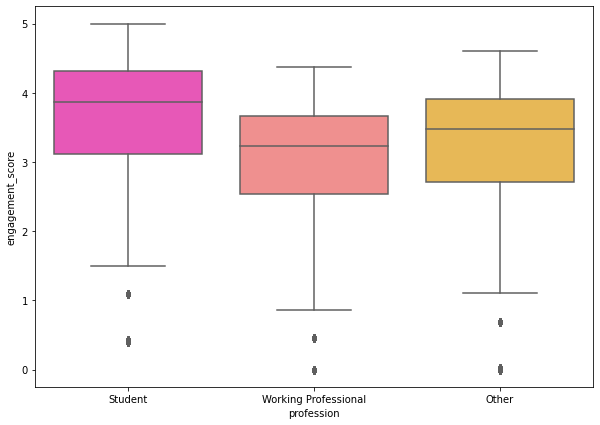

In [1584]:
# plot box distribution of engagement_score with respect to profession
plt.figure(figsize=(10,7))
sns.boxplot(x='profession',y='engagement_score', data=train, palette='spring')
plt.show()

**Q: What is the breakdown of Engagement Score with respect to Age?**

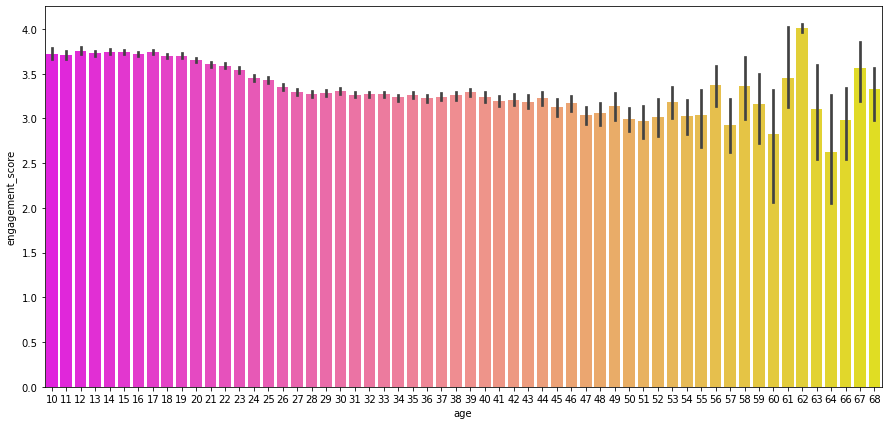

In [1585]:
# plot distribution of engagement_score with respect to age
plt.figure(figsize=(15,7))
sns.barplot(x='age',y='engagement_score', data=train, palette='spring')
plt.show()

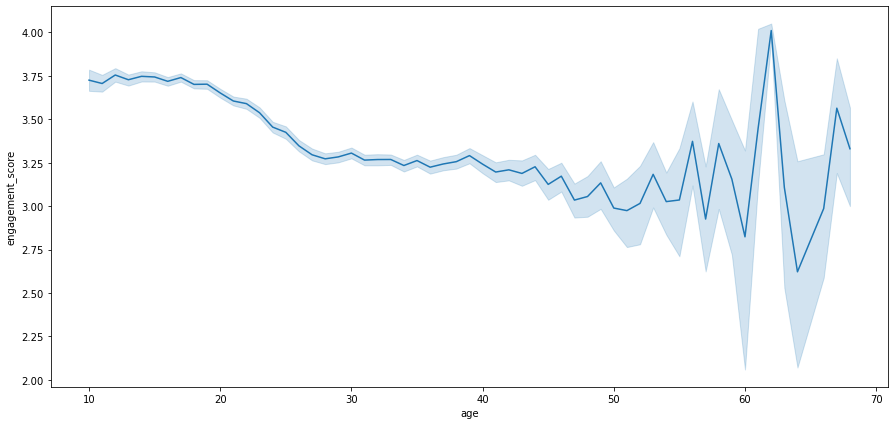

In [1586]:
# plot distribution of engagement_score with respect to age
plt.figure(figsize=(15,7))
sns.lineplot(x='age',y='engagement_score', data=train, palette='spring')
plt.show()

**Q: What is the breakdown of Followers with respect to Gender?**

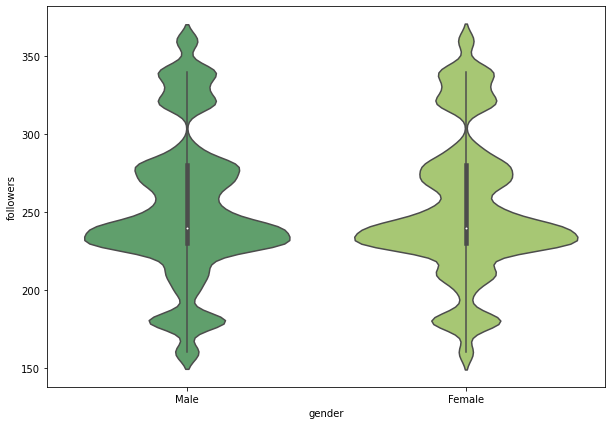

In [1587]:
# plot box distribution of followers with respect to gender
plt.figure(figsize=(10,7))
sns.violinplot(x='gender',y='followers', data=train, palette='summer')
plt.show()

**Q: What is the breakdown of Followers with respect to Profession?**

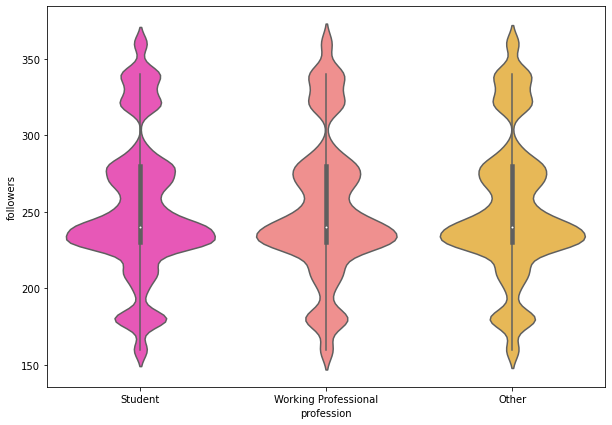

In [1588]:
# plot box distribution of followers with respect to profession
plt.figure(figsize=(10,7))
sns.violinplot(x='profession',y='followers', data=train, palette='spring')
plt.show()

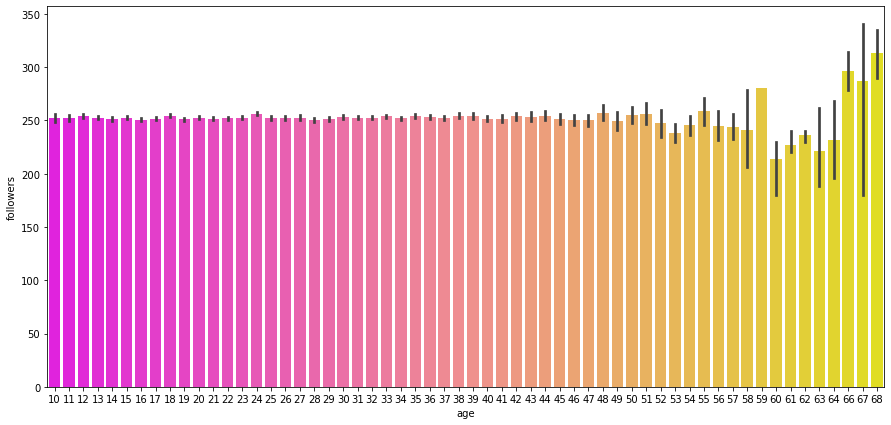

In [1589]:
# plot distribution of followers with respect to age
plt.figure(figsize=(15,7))
sns.barplot(x='age',y='followers', data=train, palette='spring')
plt.show()

**Q: What is the breakdown of Views with respect to Gender?**

<Figure size 720x504 with 0 Axes>

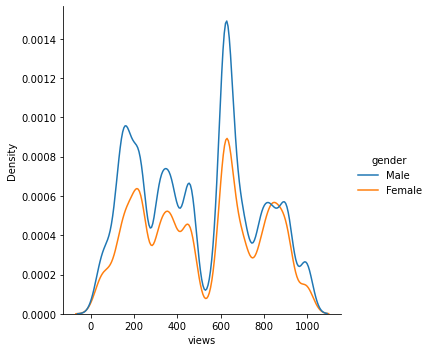

In [1590]:
# plot box distribution of views with respect to gender
plt.figure(figsize=(10,7))
sns.displot(x='views',data=train,hue='gender', kind='kde')
plt.show()

**Q: What is the breakdown of Views with respect to Profession?**

<Figure size 720x504 with 0 Axes>

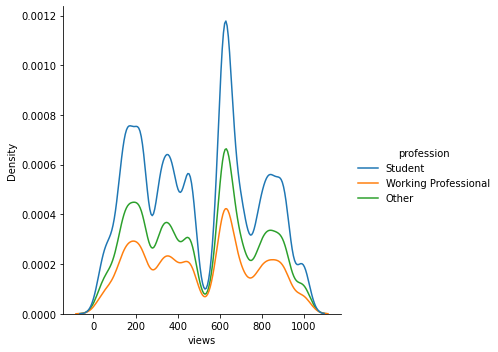

In [1591]:
# plot box distribution of views with respect to profession
plt.figure(figsize=(10,7))
sns.displot(x='views',data=train,hue='profession', kind='kde')
plt.show()

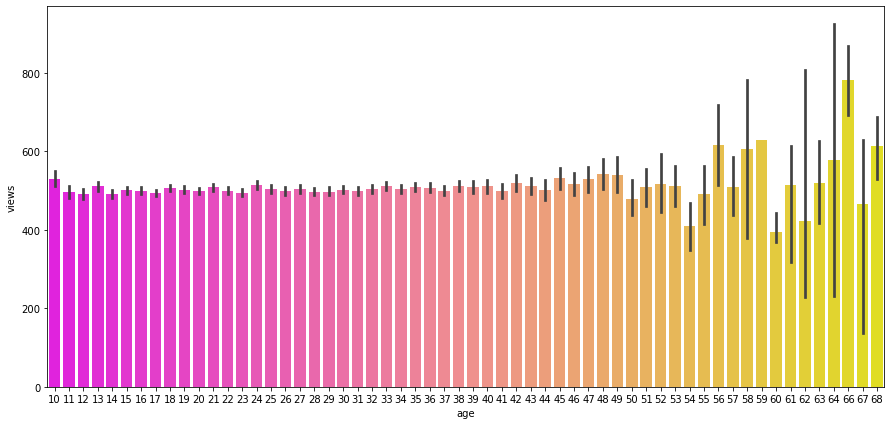

In [1592]:
# plot distribution of views with respect to age
plt.figure(figsize=(15,7))
sns.barplot(x='age',y='views', data=train, palette='spring')
plt.show()

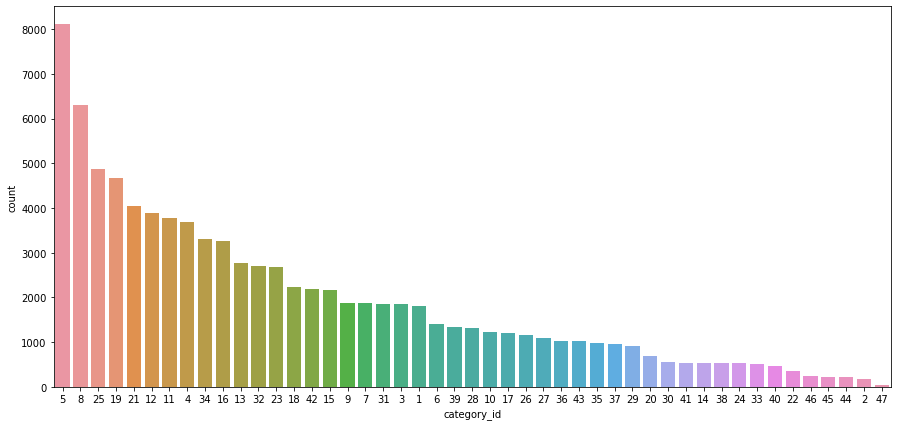

In [1593]:
# plot distribution count of category_id
plt.figure(figsize=(15,7))
sns.countplot(x='category_id',data=train,order=train['category_id'].value_counts().index)
plt.show()

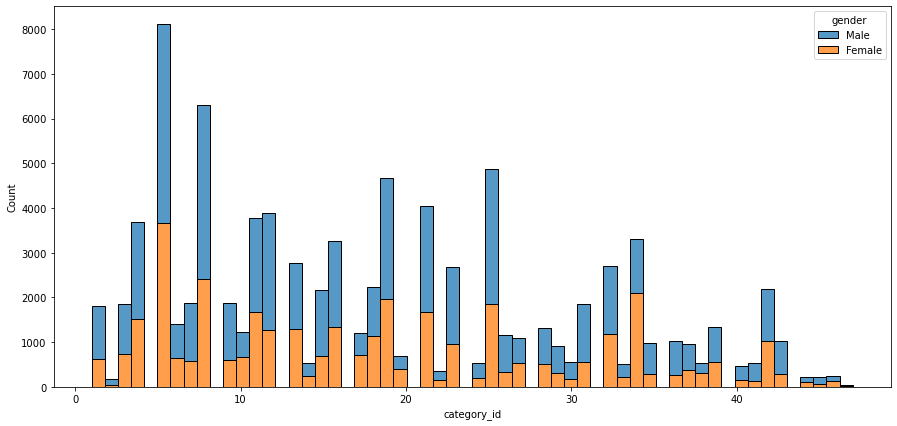

In [1594]:
# plot distribution count of category_id with respect to gender
plt.figure(figsize=(15,7))
sns.histplot(x='category_id', data=train, hue='gender', multiple='stack')
plt.show()

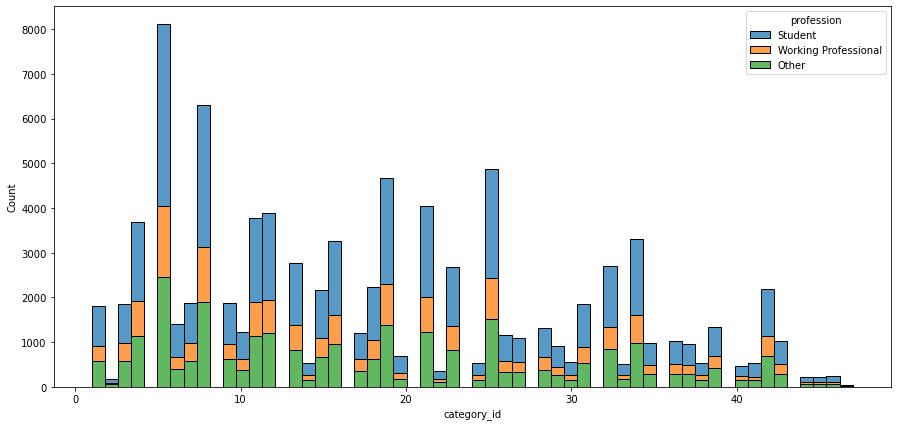

In [1595]:
# plot distribution count of category_id with respect to profession
plt.figure(figsize=(15,7))
sns.histplot(x='category_id', data=train, hue='profession', multiple='stack')
plt.show()

**Q: What is the pair plot for age, followers, views and engagement_score with respect to Gender?**

<Figure size 3600x1800 with 0 Axes>

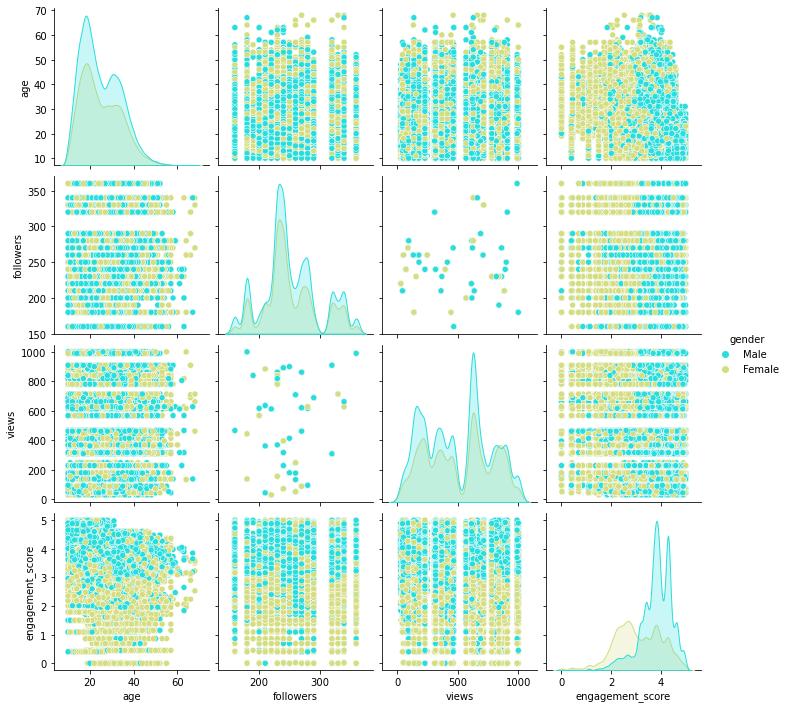

In [1596]:
plt.figure(figsize=(50,25))
sns.pairplot(train[['age','gender','followers','views','engagement_score']],palette='rainbow',diag_kind='kde',hue='gender')
plt.show()

**Q: What is the pair plot for age, followers, views and engagement_score with respect to Profession?**

<Figure size 3600x1800 with 0 Axes>

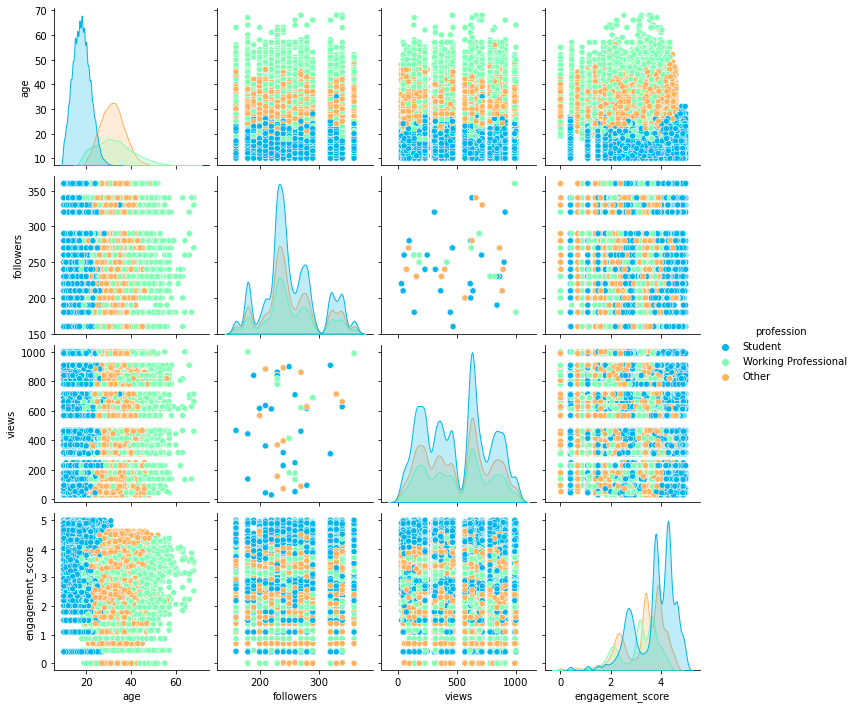

In [1597]:
plt.figure(figsize=(50,25))
sns.pairplot(train[['age','profession','followers','views','engagement_score']],palette='rainbow',diag_kind='kde',hue='profession')
plt.show()

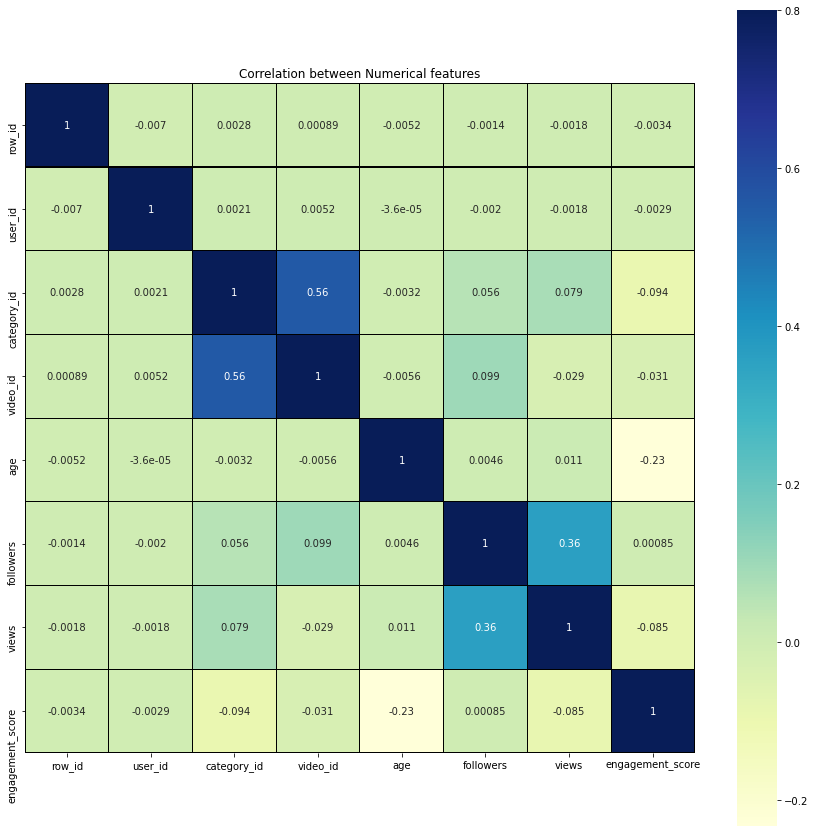

In [1598]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = train.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features')
plt.show()

In [1599]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
train.cov()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
row_id,6.630162e+08,-1.433249e+06,851.814184,1112.028454,-1198.896901,-1630.806763,-12552.896789,-74.876723
user_id,-1.433249e+06,6.408936e+07,199.962772,2030.098135,-2.602201,-747.689223,-3963.232496,-20.049474
category_id,8.518142e+02,1.999628e+02,136.309228,314.946529,-0.329607,30.369412,248.717261,-0.950559
video_id,1.112028e+03,2.030098e+03,314.946529,2349.307541,-2.437174,220.687434,-383.339667,-1.278726
age,-1.198897e+03,-2.602201e+00,-0.329607,-2.437174,80.201611,1.908378,26.557240,-1.798915
followers,-1.630807e+03,-7.476892e+02,30.369412,220.687434,1.908378,2124.699984,4466.640768,0.034024
views,-1.255290e+04,-3.963232e+03,248.717261,-383.339667,26.557240,4466.640768,72129.566564,-19.637948
engagement_score,-7.487672e+01,-2.004947e+01,-0.950559,-1.278726,-1.798915,0.034024,-19.637948,0.745629


<a name = Section6></a>

---
# **6. Data Post-Processing**
---



<a name = Section61></a>
### **6.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and drop any column as necessary

In [1600]:
# extract target variable
y = train['engagement_score']

In [1601]:
# check for missing value
y.isna().sum()

0

In [1602]:
#check shape of variable
y.shape

(89197,)

In [1603]:
# convert categorical variable into numeric by encoding for train dataset
X_encoded = pd.get_dummies(train, columns=['gender','profession'], drop_first=True)
# drop columns not required for model building
X = X_encoded.drop(columns=['row_id','user_id','engagement_score'],axis=1)

In [1604]:
# check new dataset
X.head()

,category_id,video_id,age,followers,views,gender_Male,profession_Student,profession_Working Professional
0,37,128,24,180,1000,1,1,0
1,32,132,14,330,714,0,1,0
2,12,24,19,180,138,1,1,0
3,23,112,19,220,613,1,1,0
4,23,112,27,220,613,1,0,1


In [1605]:
# convert categorical variable into numeric by encoding for test dataset
X_test_encoded = pd.get_dummies(test, columns=['gender','profession'], drop_first=True)
# drop columns not required for model building and prediction
X_test = X_test_encoded.drop(columns=['row_id','user_id'],axis=1)

In [1606]:
# check new dataset
X_test.head()

,category_id,video_id,age,followers,views,gender_Male,profession_Student,profession_Working Professional
0,12,42,14,180,138,1,1,0
1,34,115,14,230,840,1,1,0
2,8,110,44,280,628,0,0,1
3,16,137,18,270,462,1,1,0
4,34,96,47,230,840,0,0,0


<a name = Section62></a>
### **6.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [1607]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

We will try to see which feature are more important using SelectKBest

In [1608]:
# feature selection
def select_features(X_train, y_train, X_valid):
    #configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    #fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_valid_fs = fs.transform(X_valid)
    return X_train_fs, X_valid_fs, fs

In [1609]:
# feature selection
X_train_fs, X_valid_fs, fs = select_features(X_train, y_train, X_valid)

Feature 0: 650.679570


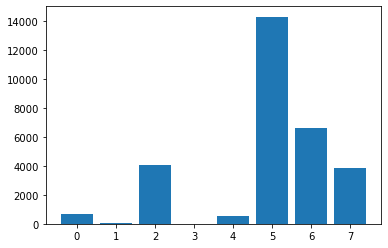

Feature 1: 65.933483


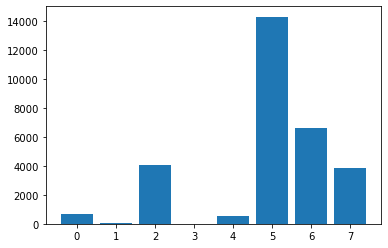

Feature 2: 4061.463652


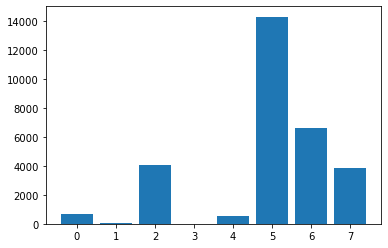

Feature 3: 0.472607


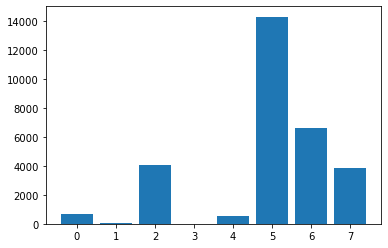

Feature 4: 515.669937


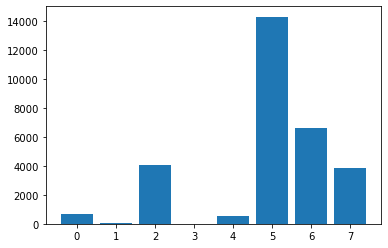

Feature 5: 14296.338635


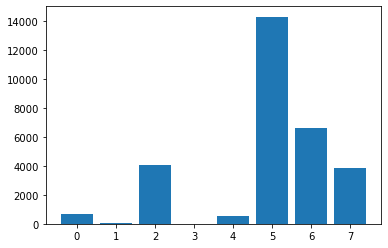

Feature 6: 6625.897608


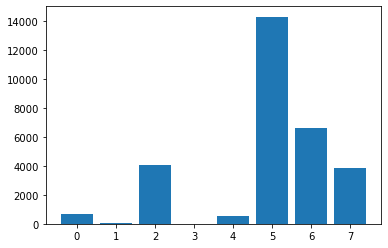

Feature 7: 3846.650405


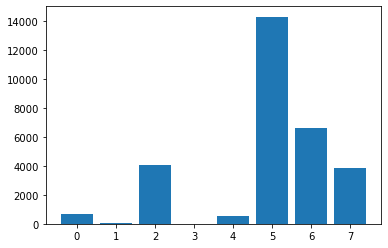

In [1612]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
    pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
    pyplot.show()

<a name = Section63></a>
### **6.3 Data Scaling**

- Trying to evaluate model with scaling of data.

In [1613]:
# # # Instantiating a standard scaler
#sc = StandardScaler()
mm = MinMaxScaler()
#rb = RobustScaler()
# # # Scaling the features
#scaled_values = sc.fit_transform(X_train)
scaled_values = mm.fit_transform(X_train)
#scaled_values = rb.fit_transform(X_train)
# # # Putting the scaled features in a dataframe
scaled_X = pd.DataFrame(data=scaled_values, columns=X_train.columns[:8])

scaled_X.head()

,category_id,video_id,age,followers,views,gender_Male,profession_Student,profession_Working Professional
0,0.086957,0.045977,0.293103,0.40,0.205155,0.0,0.0,0.0
1,0.673913,0.758621,0.241379,0.85,0.705155,1.0,1.0,0.0
2,0.086957,0.620690,0.155172,0.40,0.205155,1.0,1.0,0.0
3,0.086957,0.620690,0.155172,0.40,0.205155,1.0,1.0,0.0
4,0.260870,0.149425,0.500000,0.90,0.616495,1.0,0.0,0.0


In [1614]:
# # # Scaling the features
#scaled_test_values = sc.transform(X_test)
scaled_test_values = mm.transform(X_test)
#scaled_test_values = rb.transform(X_test)
# # # Putting the scaled features in a dataframe
scaled_test = pd.DataFrame(data=scaled_test_values, columns=X_test.columns[:8])

scaled_test.head()

,category_id,video_id,age,followers,views,gender_Male,profession_Student,profession_Working Professional
0,0.239130,0.235632,0.068966,0.10,0.111340,1.0,1.0,0.0
1,0.717391,0.655172,0.068966,0.35,0.835052,1.0,1.0,0.0
2,0.152174,0.626437,0.586207,0.60,0.616495,0.0,0.0,1.0
3,0.326087,0.781609,0.137931,0.55,0.445361,1.0,1.0,0.0
4,0.717391,0.545977,0.637931,0.35,0.835052,0.0,0.0,0.0


<a name = Section7></a>

---
# **7. Model Development & Evaluation**
---


<a name = Section71></a>
### **7.1 Baseline Model Development & Evaluation**

- Here we will develop Regression model for training, evaluation and prediction (Submission file generation)

In [1615]:
# Model Building
#features= X_train.columns
features= scaled_X.columns
LR = LinearRegression(normalize=True)
#LR.fit(X_train,y_train)
LR.fit(scaled_X,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()

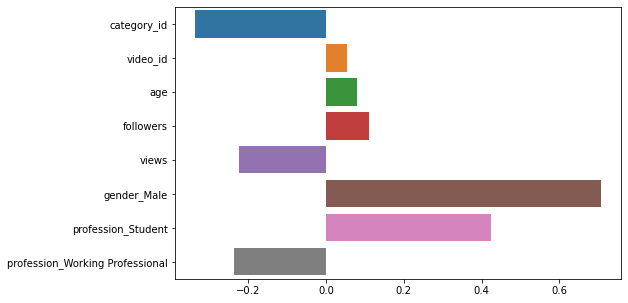

In [1616]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)
plt.show()

In [1617]:
# check R2 score
r2 = metrics.r2_score(y_valid,y_pred)
print("R2 score is {}".format(r2))

R2 score is -14161.79688339999


In [1618]:
# create RandomForestRegressore model with default parameters
rf = RandomForestRegressor(max_depth=10, random_state=42)
#rf.fit(scaled_X,y_train)
rf.fit(X_train,y_train)
# get prediction for validation data
y_pred = rf.predict(X_valid)

In [1619]:
# check R2 score
r2 = metrics.r2_score(y_valid,y_pred)
print("R2 score is {}".format(r2))

R2 score is 0.34254500423132295


In [1620]:
# create XGBRegressore model with key parameters
xgb = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)

In [1621]:
# perform training
xgb.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True, 
    early_stopping_rounds = 20)

[0]	validation_0-rmse:2.81504	validation_1-rmse:2.81903
[1]	validation_0-rmse:2.55574	validation_1-rmse:2.56005
[2]	validation_0-rmse:2.32041	validation_1-rmse:2.32518
[3]	validation_0-rmse:2.11044	validation_1-rmse:2.11569
[4]	validation_0-rmse:1.92399	validation_1-rmse:1.92962
[5]	validation_0-rmse:1.75780	validation_1-rmse:1.76385
[6]	validation_0-rmse:1.61070	validation_1-rmse:1.61753
[7]	validation_0-rmse:1.48268	validation_1-rmse:1.49028
[8]	validation_0-rmse:1.36778	validation_1-rmse:1.37595
[9]	validation_0-rmse:1.26670	validation_1-rmse:1.27584
[10]	validation_0-rmse:1.17856	validation_1-rmse:1.18823
[11]	validation_0-rmse:1.10191	validation_1-rmse:1.11290
[12]	validation_0-rmse:1.03575	validation_1-rmse:1.04736
[13]	validation_0-rmse:0.97872	validation_1-rmse:0.99093
[14]	validation_0-rmse:0.93007	validation_1-rmse:0.94281
[15]	validation_0-rmse:0.88829	validation_1-rmse:0.90162
[16]	validation_0-rmse:0.85313	validation_1-rmse:0.86752
[17]	validation_0-rmse:0.82307	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=10,
             min_child_weight=0.5, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [1622]:
# get prediction for validation data
y_pred = xgb.predict(X_valid)

In [1623]:
# check R2 score
r2 = metrics.r2_score(y_valid,y_pred)
print("R2 score is {}".format(r2))

R2 score is 0.34627682044208463


In [1624]:
# prepare for generating submission file
submission = pd.read_csv('sample_submission_JPlpRcN.csv')
#final_predictions = LR.predict(X_test)
#final_predictions = LR.predict(scaled_test)
final_predictions = rf.predict(X_test)
#final_predictions = xgb.predict(X_test)
submission['engagement_score'] = final_predictions
#only positive predictions for the target variable
submission['engagement_score'] = submission['engagement_score'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)

<a name = Section8></a>

---
# **8. Summary**
---

<a name = Section81></a>
### **8.1 Conclusion**

- RandomForestRegressor appears to be givcing the best prediction based on score generated at Leaderboard.